#### Import necessary Packages 

In [2]:
# !pip install opencv-python

     |████████████████████████████████| 46.4 MB 80 kB/s eta 0:00:014     |██████████████████████████████  | 43.6 MB 49 kB/s eta 0:00:57


In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
img = cv2.imread('/Users/takaooba/SportsPersonClassifier/test_images/cristiano_ronaldo.jpg')
img.shape

(449, 380, 3)

#### Using matplotlib to show the image

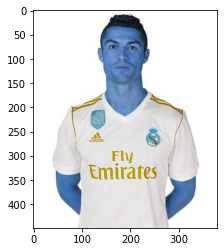

In [10]:
plt.imshow(img)

#### Notice that the image is in color, to convert this into a gray shaded image, we operate the following

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(449, 380)

#### Now the output of the shape is the same as prior, without the third component

In [13]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

#### Show the gray image using matplotlib

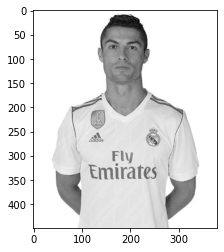

In [14]:
plt.imshow(gray, cmap = 'gray')

#### Returns array of faces
#### x, y, width, height according to the scale shown above

In [15]:
face_cascade = cv2.CascadeClassifier('/Users/takaooba/SportsPersonClassifier/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/takaooba/SportsPersonClassifier/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[135,  38, 100, 100]], dtype=int32)

#### Notice that 'faces' is a two dimensional array, so we will simply store the values

In [17]:
(x,y,w,h) = faces[0]
x,y,w,h

(135, 38, 100, 100)

#### Now that we have the coordinates, we will show a rectangle around the face

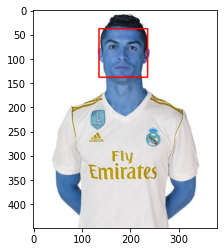

In [18]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

#### We can see that the face is clearly detected

#### Next we will detect the eyes
#### There are two for loops: one in case there are more than one faces, other in case there are more than one eyes

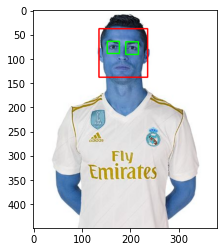

In [19]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

#### We will then crop the image to be the size of the face

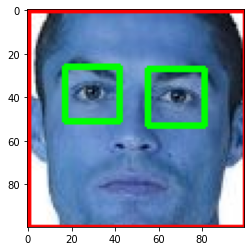

In [20]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

#### Generate a function to return the cropped image

In [22]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

#### This is the original image

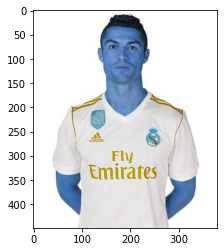

In [29]:
original_image = cv2.imread('/Users/takaooba/SportsPersonClassifier/test_images/cristiano_ronaldo.jpg')
plt.imshow(original_image)

#### This is the cropped image using the function that we just created

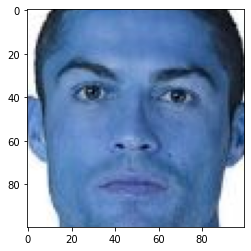

In [30]:
cropped_image = get_cropped_image_if_2_eyes('/Users/takaooba/SportsPersonClassifier/test_images/cristiano_ronaldo.jpg')
plt.imshow(cropped_image)

#### Now consider below image in which two eyes are not clearly visible

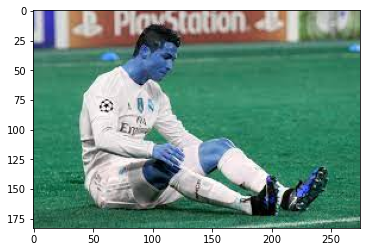

In [31]:
org_image_obstructed = cv2.imread('/Users/takaooba/SportsPersonClassifier/test_images/cristiano_ronaldo_2.jpg')
plt.imshow(org_image_obstructed)

#### We assess the detection of the face utilizing the function and as expected there is no output

In [34]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/Users/takaooba/SportsPersonClassifier/test_images/cristiano_ronaldo_2.jpg')
cropped_image_no_2_eyes

#### Change current directory and ensure that we are in the correct folder

In [37]:
import os
os.chdir('/Users/takaooba/SportsPersonClassifier')
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /Users/takaooba/SportsPersonClassifier


#### We will attempt to create a new folder with all the cropped images from the dataset file

In [38]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

#### We will store the subdirectories in  img_dirs  

In [41]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

#### As we can see, the subdirectories in the dataset file was copied in the img_dirs variable

In [42]:
img_dirs

['./dataset/Roger Federer',
 './dataset/Tom Brady',
 './dataset/Serena Williams',
 './dataset/Lebron James',
 './dataset/Usain Bolt',
 './dataset/Floyd Mayweather',
 './dataset/Cristiano Ronaldo']

#### To perform high-operations on the files, we will utilize the shutil module
#### First, if cropped folder already exists, we will remove it
#### Then, generate the cropped folder into the dataset path

In [44]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

#### We will take the specific sport celebrity's name by spliting the string, this is how we will go through and detect the face for all the celebrities
#### Then, we will generate the cropped images for each celebrity if two eyes are detected
#### Notice that we will be appending all of the new files into the cropped files that we have generated previously
#### We will finally make a dictionary which will be used on later

In [47]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Roger Federer
Tom Brady
Serena Williams
Generating cropped images in folder:  ./dataset/cropped/Serena Williams
Lebron James
Generating cropped images in folder:  ./dataset/cropped/Lebron James
Usain Bolt
Generating cropped images in folder:  ./dataset/cropped/Usain Bolt
Floyd Mayweather
Generating cropped images in folder:  ./dataset/cropped/Floyd Mayweather
Cristiano Ronaldo
Generating cropped images in folder:  ./dataset/cropped/Cristiano Ronaldo
